In [1]:
clc;clear;close all;
addpath('function','data');
load('import_phy.mat')

In [62]:
[u_avg, v_avg, w_avg,p_avg] = calculateMeanVelocity(Up, Vp, Wp,P);
[u_turb, v_turb, w_turb,p_turb] = calculateTurbulentFluctuations(Up, Vp, Wp, P,u_avg, v_avg, w_avg,p_avg);
[rey_uu, rey_uv, rey_uw, rey_vv, rey_vw, rey_ww] = calculateReynoldsStress(u_turb, v_turb, w_turb);
[u_tau, delta_v, Re_tau,y_plus] = calculateWall(u_avg, Y,Rem);

In [70]:
pk = calculatePk(Y,u_avg,rey_uv);
Dkt = calculateDkt(Y,u_turb,v_turb,w_turb);
Dkp = calculateDkp(Y,p_turb,v_turb);
Dkv = calculateDkv(Y,u_turb,v_turb,w_turb);
diss = calculatediss(X,Y,Z,u_turb,v_turb,w_turb);

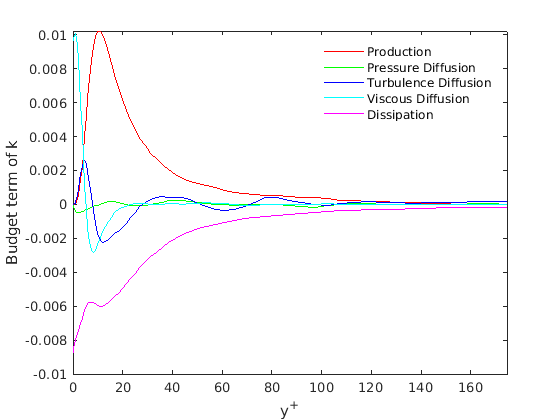

In [72]:
plot(y_plus(1:end-1),pk,'r','LineWidth',1.4)
hold on
plot(y_plus(1:end-1),Dkp ,'g','LineWidth',1.4)
hold on
plot(y_plus(1:end-1),Dkt,'b','LineWidth',1.4)
hold on
plot(y_plus(1:end-2),Dkv ,'c','LineWidth',1.4)
hold on
plot(y_plus(1:end-1),diss,'m','LineWidth',1.4)
hold on
legend('Production','Pressure Diffusion','Turbulence Diffusion','Viscous Diffusion','Dissipation','box','off')  
y_plus_half = max(y_plus)/2;
xlim([0 y_plus_half]);
xlabel('y^+')
ylabel('Budget term of k')
print(gcf, './photo/part3/Budget term of k.png', '-dpng', '-r300');